# Project - COVID-19 Analysis [EDA & Visualization]

- You can find the full project at: https://ourworldindata.org/coronavirus
- Daily-updated dataset link: https://covid.ourworldindata.org/data/owid-covid-data.csv
- We'll be exploring the dataset from: https://covid.ourworldindata.org
- Dashboard Example: https://coronavirus.jhu.edu/map.html

## DATA UNDERSTANDING

### Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133077,ZWE,Africa,Zimbabwe,2021-11-09,133242.0,37.0,27.857,4691.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133078,ZWE,Africa,Zimbabwe,2021-11-10,133302.0,60.0,30.143,4694.0,3.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133079,ZWE,Africa,Zimbabwe,2021-11-11,133329.0,27.0,31.000,4694.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133080,ZWE,Africa,Zimbabwe,2021-11-12,133329.0,0.0,31.000,4694.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
133077,ZWE,Africa,Zimbabwe,2021-11-09,133242.0,37.0,27.857,4691.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133078,ZWE,Africa,Zimbabwe,2021-11-10,133302.0,60.0,30.143,4694.0,3.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133079,ZWE,Africa,Zimbabwe,2021-11-11,133329.0,27.0,31.000,4694.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133080,ZWE,Africa,Zimbabwe,2021-11-12,133329.0,0.0,31.000,4694.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133081,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
df.shape

(133082, 65)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133082 entries, 0 to 133081
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 133082 non-null  object 
 1   continent                                124582 non-null  object 
 2   location                                 133082 non-null  object 
 3   date                                     133082 non-null  object 
 4   total_cases                              125824 non-null  float64
 5   new_cases                                125822 non-null  float64
 6   new_cases_smoothed                       124779 non-null  float64
 7   total_deaths                             114691 non-null  float64
 8   new_deaths                               114887 non-null  float64
 9   new_deaths_smoothed                      124779 non-null  float64
 10  total_cases_per_million         

In [9]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.258240e+05,125822.000000,124779.000000,1.146910e+05,114887.000000,124779.000000,125178.000000,125176.000000,124138.000000,114058.000000,...,89621.000000,88325.000000,57903.000000,104548.000000,123718.000000,115149.000000,4656.000000,4656.000000,4656.000000,4656.000000
mean,2.049020e+06,8361.113160,8377.084802,5.064728e+04,183.942161,168.581236,19743.521077,86.502110,86.392769,404.596047,...,10.589635,32.748964,50.863232,3.029350,73.260225,0.726195,32052.628565,8.667889,15.883224,781.114218
std,1.169135e+07,43572.247331,43050.010696,2.599152e+05,871.178922,817.372312,32711.527864,199.383251,168.744384,664.800109,...,10.502611,13.513210,31.821149,2.455487,7.532186,0.150040,90422.651800,15.939853,31.062810,1166.907295
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1749.128494
25%,2.405000e+03,3.000000,10.429000,8.100000e+01,0.000000,0.143000,413.046750,0.329000,1.657000,11.986000,...,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000,-167.750000,-0.972500,-0.835000,-43.100925
50%,2.740300e+04,104.000000,130.286000,7.460000e+02,2.000000,2.000000,3191.094500,11.316000,15.890000,80.600000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,2315.900000,5.215000,6.465000,364.906628
75%,2.655292e+05,1078.000000,1135.071500,6.499500e+03,22.000000,18.571000,25045.823000,83.545000,93.088750,526.695500,...,19.300000,41.300000,83.241000,4.000000,78.740000,0.845000,20475.200000,13.580000,22.300000,1351.300112
max,2.529706e+08,907963.000000,826457.571000,5.095849e+06,18007.000000,14703.286000,241588.661000,8620.690000,3385.473000,6013.445000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,870830.300000,106.840000,373.610000,6157.832804


==========

## EXPLORING WORLD DATA

### Listinf all countries / regions in our data

In [10]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [11]:
df['location'].nunique()

237

### Selecting the 'World' data

In [12]:
df_world = df[df.location == 'World']
df_world

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
130627,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
130628,OWID_WRL,NaN,World,2020-01-23,655.0,98.0,NaN,18.0,1.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
130629,OWID_WRL,NaN,World,2020-01-24,941.0,286.0,NaN,26.0,8.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
130630,OWID_WRL,NaN,World,2020-01-25,1434.0,493.0,NaN,42.0,16.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
130631,OWID_WRL,NaN,World,2020-01-26,2118.0,684.0,NaN,56.0,14.0,NaN,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131284,OWID_WRL,NaN,World,2021-11-09,250850973.0,479447.0,467277.714,5064692.0,8164.0,7183.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
131285,OWID_WRL,NaN,World,2021-11-10,251424349.0,573376.0,475118.429,5072805.0,8113.0,7155.429,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
131286,OWID_WRL,NaN,World,2021-11-11,251941011.0,516662.0,473832.714,5080351.0,7546.0,7140.429,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
131287,OWID_WRL,NaN,World,2021-11-12,252526354.0,585343.0,484151.286,5089008.0,8657.0,7155.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


### Finding the date of the maximum number of deaths all over the world

In [13]:
df_world[df_world['new_deaths'] == df_world['new_deaths'].max()]['date']

130991    2021-01-20
Name: date, dtype: object

### Creating a summary table for the most recent date all over the world

In [14]:
df_world_recent = df_world[df_world['date'] == df_world.date.max()]
df_world_recent

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131288,OWID_WRL,NaN,World,2021-11-13,252970612.0,444258.0,489132.429,5095849.0,6841.0,7203.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [15]:
 df_world_recent.groupby("date")[["total_cases","new_cases","new_deaths","total_deaths",'people_vaccinated']].sum()

,total_cases,new_cases,new_deaths,total_deaths,people_vaccinated
date,,,,,
2021-11-13,252970612.0,444258.0,6841.0,5095849.0,4.068261e+09


### Calculating the percentage of confirmed cases regarding the world population

In [16]:
df_world['population'].unique()

array([7.87496573e+09])

In [17]:
df_world['total_cases'].max()

252970612.0

In [18]:
df_world_ratio = df_world['total_cases'].max() / df_world['population'].max()
df_world_ratio

0.03212339211030446

==========

## VISUALLIZING WORLD DATA

### Confirmed cases (Total Cases) all over the world

In [19]:
df_world_over_time = df_world.groupby(["date"])[["total_cases","new_cases","total_deaths","new_deaths"]].sum().reset_index().sort_values("date",ascending=True).reset_index(drop=True)
df_world_over_time

,date,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-22,557.0,0.0,17.0,0.0
1,2020-01-23,655.0,98.0,18.0,1.0
2,2020-01-24,941.0,286.0,26.0,8.0
3,2020-01-25,1434.0,493.0,42.0,16.0
4,2020-01-26,2118.0,684.0,56.0,14.0
...,...,...,...,...,...
657,2021-11-09,250850973.0,479447.0,5064692.0,8164.0
658,2021-11-10,251424349.0,573376.0,5072805.0,8113.0
659,2021-11-11,251941011.0,516662.0,5080351.0,7546.0
660,2021-11-12,252526354.0,585343.0,5089008.0,8657.0


Text(0, 0.5, 'Confirmed cases')

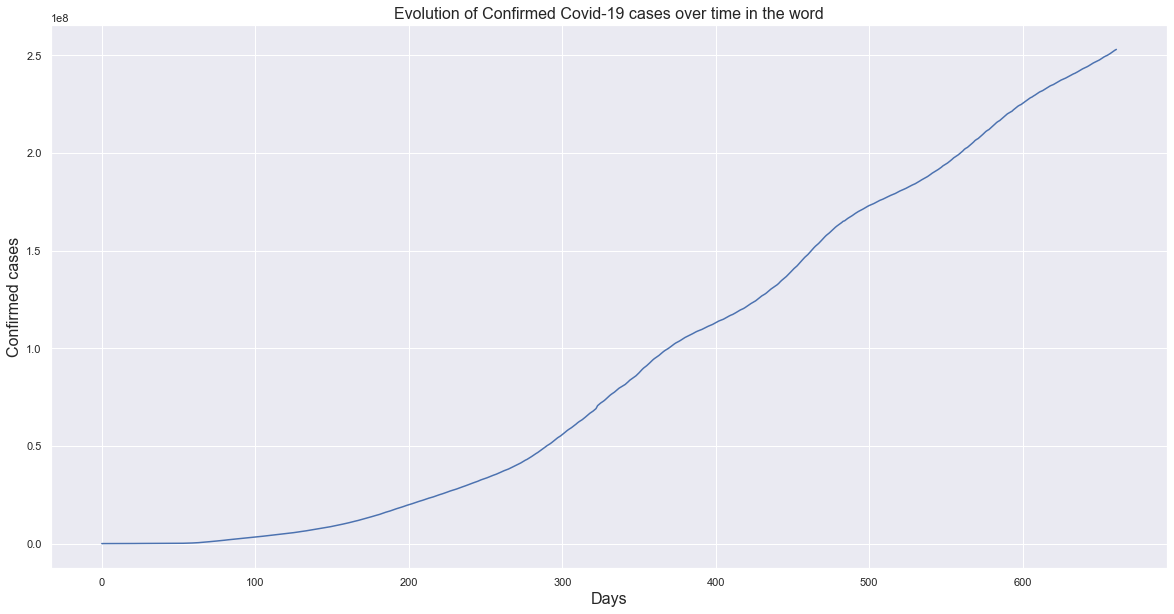

In [20]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.plot(df_world_over_time.index, df_world_over_time['total_cases'])
plt.title('Evolution of Confirmed Covid-19 cases over time in the word', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Confirmed cases', fontsize=16)

### Total deaths cases evolution over time

In [ ]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.plot(df_world_over_time.index, df_world_over_time['total_deaths'])
plt.title('Evolution of Covid-19 Deaths cases over time in the world', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Number of Deaths', fontsize=16)

### New cases all over the world

In [ ]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.bar(df_world_over_time.index, df_world_over_time['new_cases'])
plt.title('Evolution of Covid-19 New Cases over time in the world', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('New Cases', fontsize=16)

### Putting it all together

In [ ]:
# Using line-plot
plt.figure(figsize=(20,10))
plt.plot(df_world_over_time.index, df_world_over_time['total_cases'], label='Confirmed')
plt.plot(df_world_over_time.index, df_world_over_time['total_deaths'], label='Total Deaths')
plt.plot(df_world_over_time.index, df_world_over_time['new_cases'], label='New')
plt.plot(df_world_over_time.index, df_world_over_time['new_deaths'], label='New Deaths')
plt.legend(loc=0)
plt.show()

==========

## EXPLORING EGYPT DATA

### Let's first get 'Egypt' data

In [ ]:
df_egypt = df[df['location'] == 'Egypt']
df_egypt

### Creating a summary table for the most recent 'Egypt' data

In [ ]:
df_egypt[['total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]]

In [ ]:
df_egypt_recent = df_egypt[df_egypt['date'] == df_egypt.date.max()]
df_egypt_recent

In [ ]:
df_egypt_recent[['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]]

### Calculating the maximum values of 'Egypt' data

In [ ]:
df_egypt[['total_cases', 'new_cases', 'total_deaths', 'new_deaths' ]].max()

### The highest date recorded for death in Egypt

In [ ]:
df_egypt[df_egypt['new_deaths'] == df_egypt['new_deaths'].max()]['date']

### The average value(s) of daily-recorded data in Egypt

In [ ]:
df_egypt['new_cases'].mean()

### New cases of January 2021 in Egypt

In [ ]:
df_egypt_mod = df_egypt[['date', 'new_cases']]
df_egypt_mod

In [ ]:
df_egypt_mod.info()

In [ ]:
pd.to_datetime(df_egypt_mod['date'])

In [ ]:
df_egypt_mod.info()

In [ ]:
df_egypt_mod.set_index('date')

In [ ]:
# New cases in January 2021 in Egypt
df_jan_egypt = df_egypt_mod[(df_egypt_mod.date >= '2021-01-01') & (df_egypt_mod.date <= '2021-01-31')].reset_index(drop=True)
df_jan_egypt

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_jan_egypt.index, df_jan_egypt['new_cases'])

In [ ]:
df_jan_egypt[df_jan_egypt['date'] == '2021-01-03']

==========

# THANK YOU!